In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gdown

In [3]:
!gdown --id 1h56_fohC7DiLee7wStLGHH97tb96ZPNM
#Link to download dataset https://archive.ics.uci.edu/ml/datasets/iris

Downloading...
From: https://drive.google.com/uc?id=1h56_fohC7DiLee7wStLGHH97tb96ZPNM
To: d:\Freshy_KMUTT_PCCMS\HDS-YEAR-3\HON001 Data visualization\NCHS.csv

  0%|          | 0.00/1.28M [00:00<?, ?B/s]
 41%|████      | 524k/1.28M [00:00<00:00, 1.55MB/s]
 82%|████████▏ | 1.05M/1.28M [00:00<00:00, 2.02MB/s]
100%|██████████| 1.28M/1.28M [00:00<00:00, 2.01MB/s]
100%|██████████| 1.28M/1.28M [00:00<00:00, 1.94MB/s]
[WinError 32] The process cannot access the file because it is being used by another process: 'd:\\Freshy_KMUTT_PCCMS\\HDS-YEAR-3\\HON001 Data visualization\\NCHS.csv6a2ijuxktmp'


In [4]:
data = pd.read_csv("NCHS.csv")
data.head(5)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7


In [5]:
data.shape

(15028, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15028 entries, 0 to 15027
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     15028 non-null  int64  
 1   113 Cause Name           15028 non-null  object 
 2   Cause Name               15028 non-null  object 
 3   State                    15028 non-null  object 
 4   Deaths                   15013 non-null  float64
 5   Age-adjusted Death Rate  14917 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 704.6+ KB


In [7]:
data.describe()

,Year,Deaths,Age-adjusted Death Rate
count,15028.000000,1.501300e+04,14917.000000
mean,2007.000000,1.023261e+04,86.526393
std,4.899142,9.003261e+04,190.764950
min,1999.000000,1.000000e+01,1.300000
25%,2003.000000,2.940000e+02,8.300000
50%,2007.000000,8.380000e+02,18.900000
75%,2011.000000,2.737000e+03,46.300000
max,2015.000000,2.712630e+06,1087.300000


In [8]:
null_check = data.isnull()
null_check.sum()

Year                         0
113 Cause Name               0
Cause Name                   0
State                        0
Deaths                      15
Age-adjusted Death Rate    111
dtype: int64

In [9]:
data = data.dropna()
null_check = data.isnull()
null_check.sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [10]:
data.shape

(14917, 6)

In [11]:
causes = data['Cause Name'].unique()
causes

array(['Unintentional Injuries', 'All Causes', "Alzheimer's disease",
       'Homicide', 'Stroke', 'Chronic liver disease and cirrhosis',
       'CLRD', 'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

In [12]:
datal = data[data['State']!='United States']
state = datal["State"].unique()
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [13]:
dyear = data.groupby(['Year']).sum()
dyear

,Deaths,Age-adjusted Death Rate
Year,,
1999,8835674.0,84352.0
2000,8860799.0,83635.2
2001,8896821.0,82676.8
2002,8991570.0,82469.4
2003,8993821.0,81348.1
2004,8794551.0,78058.2
2005,8958942.0,78363.5
2006,8843175.0,75954.2
2007,8826636.0,74451.6


<AxesSubplot:title={'center':'Death per year \n 1999-2015'}, xlabel='Year'>

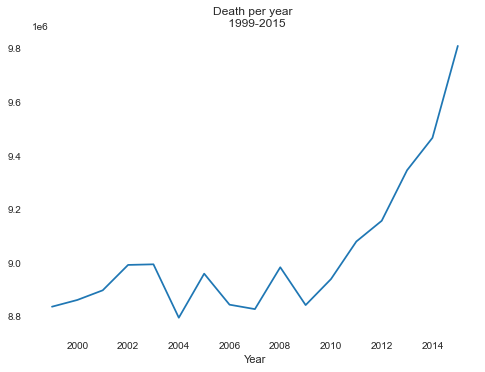

In [14]:
dyear['Deaths'].plot(title='Death per year \n 1999-2015')


<AxesSubplot:title={'center':'Death per year \n 1999-2015'}, xlabel='Year'>

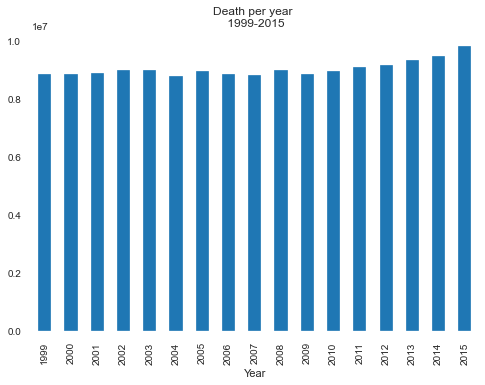

In [15]:
dyear['Deaths'].plot.bar(title = 'Death per year \n 1999-2015')

In [16]:
data1 = data[data["State"]!="United States"]
dataset2 = datal.groupby("State").sum()
dataset2.sort_values("Deaths",ascending=False,inplace=True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
State,,,
California,580023,7467282.0,21997.1
Florida,580023,5331317.0,22623.4
Texas,580023,5048222.0,25133.3
New York,580023,4757239.0,22422.7
Pennsylvania,580023,3966825.0,25178.4
Ohio,580023,3397289.0,26504.1
Illinois,580023,3225662.0,24644.9
Michigan,580023,2751878.0,25683.4
North Carolina,580023,2372383.0,26164.9


<AxesSubplot:title={'center':'Top ten states with highest death number \n 1999-2015'}, xlabel='State'>

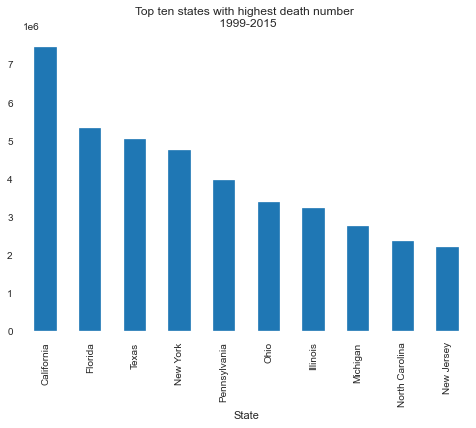

In [17]:
dataset2["Deaths"].head(10).plot.bar(title = 'Top ten states with highest death number \n 1999-2015')

In [23]:
dataset1 = data[data['Cause Name']!= 'All Causes']
dataset2 = dataset1.groupby("Cause Name").sum()
dataset2.sort_values('Deaths',ascending=False,inplace=True)
dataset2.head()

,Year,Deaths,Age-adjusted Death Rate
Cause Name,,,
Diseases of Heart,1774188,21879846.0,178315.3
Cancer,1774188,19292996.0,160163.8
Stroke,1774188,4875996.0,41458.8
CLRD,1774188,4560260.0,39545.5
Unintentional Injuries,1774188,4033020.0,37368.6


<AxesSubplot:title={'center':'Top ten cause of death in USA \n 1999-2015'}, xlabel='Cause Name'>

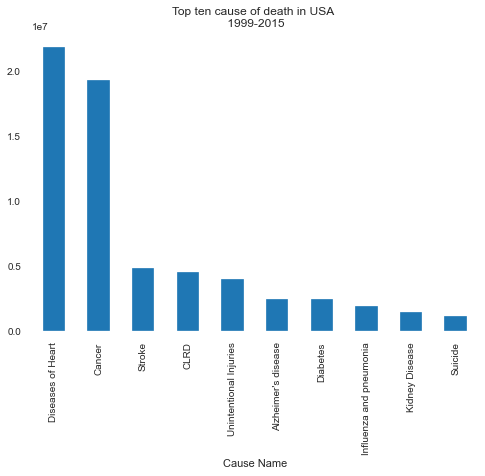

In [25]:
dataset2['Deaths'].head(10).plot.bar(title = "Top ten cause of death in USA \n 1999-2015")